In [1]:
# Description : Use the Relative Strength Index (RSI) and Python to determine if a stock is being over bought or sell.

In [21]:
# Import the libraries
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.graph_objs as go

In [14]:
aapl = data.DataReader("AAPL", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624


In [18]:
# Set the date as the index for the data
aapl.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

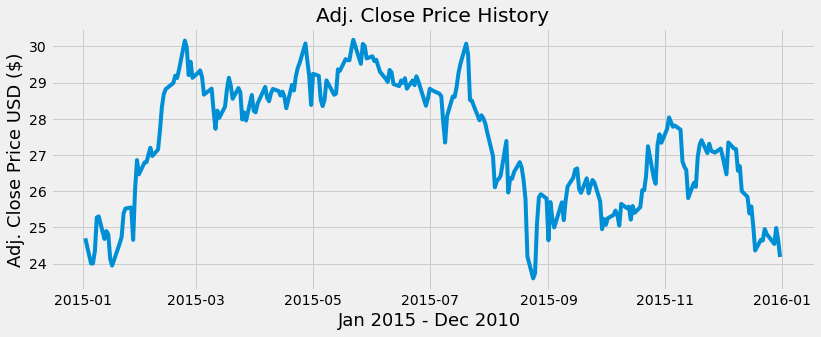

In [20]:
# Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(aapl.index, aapl['Adj Close'], label='Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('Jan 2015 - Dec 2010 ', fontsize=18)
plt.ylabel('Adj. Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# declare a figure
fig=go.Figure()

# Y-Axes
fig.add_trace(go.Scatter(x=aapl.index, y=aapl['Adj Close'], line=dict(width=1.5, color = 'blue'), name = 'Middle Band'))

# Add titles
fig.update_layout(title = 'Adj. Close Price History', yaxis_title='Adj. Close Price USD ($)')

fig.show()

In [25]:
# Prepare the data to calculate the RSI

# Get the difference in price from the previous day
delta = aapl['Adj Close'].diff(1)

delta

Date
2015-01-02         NaN
2015-01-05   -0.695738
2015-01-06    0.002262
2015-01-07    0.336571
2015-01-08    0.935177
                ...   
2015-12-24   -0.133249
2015-12-28   -0.277981
2015-12-29    0.441093
2015-12-30   -0.326227
2015-12-31   -0.473255
Name: Adj Close, Length: 252, dtype: float64

In [26]:
# Get rid of NaN
delta = delta.dropna()
delta

Date
2015-01-05   -0.695738
2015-01-06    0.002262
2015-01-07    0.336571
2015-01-08    0.935177
2015-01-09    0.027107
                ...   
2015-12-24   -0.133249
2015-12-28   -0.277981
2015-12-29    0.441093
2015-12-30   -0.326227
2015-12-31   -0.473255
Name: Adj Close, Length: 251, dtype: float64

In [27]:
# Get the positive gains (up) and the negative gains(down)

up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down > 0] = 0

In [28]:
# Ge the time period
period = 14

# Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [29]:
# Calculate RSI

# Calculate the Relative Strenght(RS)
RS = AVG_Gain / AVG_Loss

# Calculate the Relative Strength Index(RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

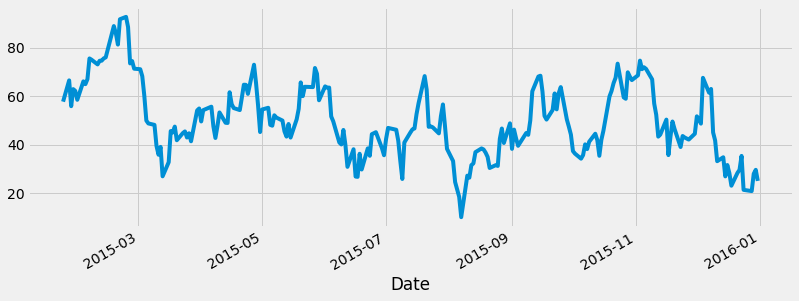

In [30]:
# Show the RSI Visually
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [32]:
# Put it all together

# Create a new data frame
new_df = pd.DataFrame()

new_df['Adj Close'] = aapl['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
Date,,
2015-01-02,24.696352,NaN
2015-01-05,24.000614,NaN
2015-01-06,24.002876,NaN
2015-01-07,24.339447,NaN
2015-01-08,25.274624,NaN
...,...,...
2015-12-24,24.818476,21.294340
2015-12-28,24.540495,20.795059
2015-12-29,24.981588,27.919914


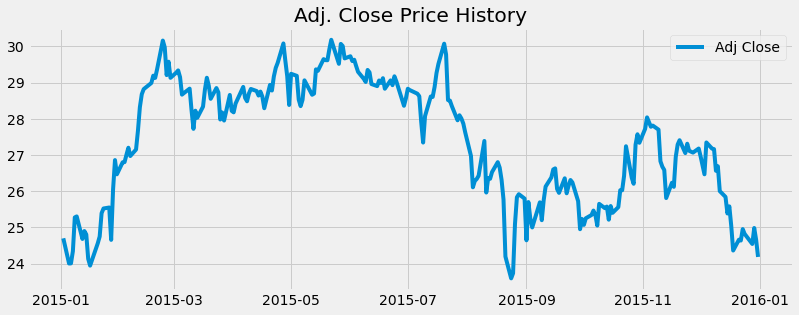

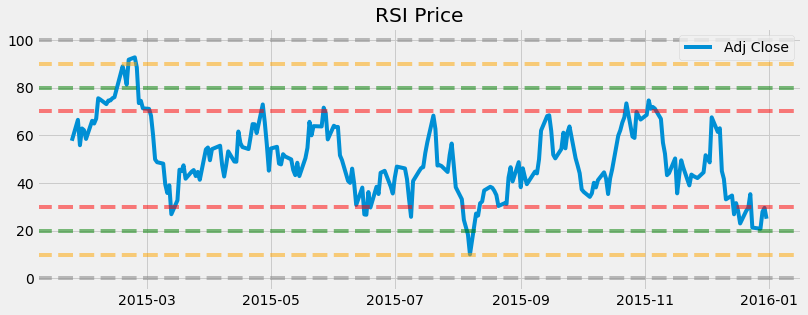

In [37]:
# Visually show the adjusted close price and RSI

# Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values)
plt.show()

# Plot the RSI Close Price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['RSI'])
plt.title('RSI Price')
plt.legend(new_df.columns.values)
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(10, linestyle='--', alpha=0.5, color='orange')
plt.axhline(20, linestyle='--', alpha=0.5, color='green')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(80, linestyle='--', alpha=0.5, color='green')
plt.axhline(90, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
plt.show()